In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib 

%matplotlib inline



In [337]:
! python --version


Python 3.11.7


In [2]:
#our dataset was downloaded from kaggle: https://www.kaggle.com/code/imdevskp/amazon-reviews-sentiment-analysis-and-prediction/input

df = pd.read_csv("Amazon_Unlocked_Mobile.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413840 entries, 0 to 413839
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Product Name  413840 non-null  object 
 1   Brand Name    348669 non-null  object 
 2   Price         407907 non-null  float64
 3   Rating        413840 non-null  int64  
 4   Reviews       413770 non-null  object 
 5   Review Votes  401544 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 18.9+ MB


In [3]:
df.head(10)

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
5,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,1,I already had a phone with problems... I know ...,1.0
6,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,2,The charging port was loose. I got that solder...,0.0
7,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,2,"Phone looks good but wouldn't stay charged, ha...",0.0
8,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I originally was using the Samsung S2 Galaxy f...,0.0
9,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,3,It's battery life is great. It's very responsi...,0.0


In [4]:
#The number of various mobile phones

df['Product Name'].nunique()

4410

In [5]:
#How many brends name are in the dataset
df['Brand Name'].nunique()

384

In [6]:
#first we are dealing with the duplicates and NaNs

In [7]:
#duplicated rows?
n_rows_duplicated = df.duplicated().sum()

print("Number of duplicated rows:", n_rows_duplicated)
df.drop_duplicates(inplace=True)

Number of duplicated rows: 64079


In [8]:
#we want to drop all duplicates
df.drop_duplicates()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
413825,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,"Great phone. Large keys, best flip phone I hav...",0.0
413826,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,"Pros...Works great, very durable, easy to navi...",0.0
413827,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,just as described perfect for the price,0.0
413828,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,1,Would not work,0.0


In [9]:
df.isna().sum()

Product Name        0
Brand Name      54737
Price            5237
Rating              0
Reviews            57
Review Votes    12274
dtype: int64

In [10]:
#We decided to remove the NaN in Reviews since we can not make any use of the columns without reviews
df.dropna(subset = ['Reviews'], inplace=True)

In [11]:
#now we only have NaNs in Brand name, Price adn review notes left
df.isnull().sum()

Product Name        0
Brand Name      54724
Price            5234
Rating              0
Reviews             0
Review Votes    12274
dtype: int64

In [12]:
#we decided to just replace the NaNs in Column 'Review Votes' with 0s
df['Review Votes'].fillna(0, inplace=True)

In [13]:
#we dont want to drop the column with no brand names so far so we replace the NaNs with 'Unknown' and 
#later we will fill it with the correct names

df['Brand Name'].fillna('Unknown', inplace=True)

In [14]:
unknown_brands_df = df[df['Brand Name'] == 'Unknown']
print("There is",unknown_brands_df.shape[0], "unknown values in the brand name column.")
display(unknown_brands_df.head(20))

There is 54809 unknown values in the brand name column.


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
110,((Unlocked))BlackBerry Bold 9650 Unlocked Clea...,Unknown,269.10,2,when i got phone it wouldn't work I took it to...,0.0
111,((Unlocked))BlackBerry Bold 9650 Unlocked Clea...,Unknown,269.10,4,I liked,0.0
112,((Unlocked))BlackBerry Bold 9650 Unlocked Clea...,Unknown,269.10,5,Great. Arrived quickly.,0.0
113,((Unlocked))BlackBerry Bold 9650 Unlocked Clea...,Unknown,269.10,4,"Phone works great, you may have to get a sum c...",0.0
114,((Unlocked))BlackBerry Bold 9650 Unlocked Clea...,Unknown,269.10,5,Avianna LLC is an incredible seller. The phone...,0.0
115,((Unlocked))BlackBerry Bold 9650 Unlocked Clea...,Unknown,269.10,3,"Ad advertised as unlocked, had to pay $30..00 ...",0.0
116,((Unlocked))BlackBerry Bold 9650 Unlocked Clea...,Unknown,269.10,5,Exactly what I was expecting.thank you.,1.0
117,((Unlocked))BlackBerry Bold 9650 Unlocked Clea...,Unknown,269.10,5,Got it faster than I expected. Just what I nee...,0.0
276,"2.45 "" IPS Touch Screen the World's Smallest A...",Unknown,72.99,1,My friend brought it to me at work after i ord...,3.0
277,"2.45 "" IPS Touch Screen the World's Smallest A...",Unknown,72.99,1,My friend brought it to me at work after i ord...,2.0


In [15]:
unknown_brands_df['Product Name'].nunique()

#for these products we have to find the brend names

684

In [16]:
df['Brand Name'].unique()

#we can see here, that a lot of brand names are not standardized
#and are even misspelled (see Blackberry -BlackBerry - Black Berry -Blackberrry)
#all of them we have to bring to standart

array(['Samsung', 'Nokia', 'Unknown', 'HTM', 'Jethro', 'e passion',
       'Cedar Tree Technologies', 'Indigi', 'Phone Baby', 'OtterBox',
       'Lenovo', 'Huawei', 'JUNING', 'Elephone', 'Plum', 'VKworld',
       'NOKIA', 'Ulefone', 'Jiuhe', 'inDigi', 'Acer', 'Aeku', 'AKUA',
       'Alcatel', 'TCL Mobile', 'LG', 'amar', 'Amazon', 'Odysseus',
       'Digital SNITCH', 'star', 'Android', 'Yezz', 'Yezz Wireless Ltd.',
       'Apple', 'Apple Computer', 'Certified Refurbished',
       'Amazon.com, LLC *** KEEP PORules ACTIVE ***', 'apple',
       'ARGOM TECH', 'Asus', 'ASUS', 'ASUS Computers', 'asus',
       'BlackBerry', 'Motorola', 'Palm', 'Pantech', 'ZTE', 'ATT',
       'UnAssigned', 'Atoah',
       'BlackBerry Storm 9530 Smartphone Unlocked GSM Wireless Handheld Device w/Camera Bluetooth 3.25" Touchscreen LCD',
       'WorryFree Gadgets', 'worryfree', 'iDROID USA', 'Blackberry (Rim)',
       'Research In Motion', 'BLACKBERRY', 'Black Berry', 'Blackberry',
       'blackberry', 'RIM', 'Res

In [17]:
#Capitalizing the column "Brand Name" to standardize the data
# and get a consistency of the latter for all brandnames of datatype string

df['Brand Name'] = df['Brand Name'].apply(lambda x: x.upper() if isinstance(x, str) else x)

In [18]:
df['Brand Name'].nunique()
#we can see that the number of inputs for the Brand Name has been reduced from 384 to 330

330

In [19]:
# replacing all duplicates of Blackberry
df['Brand Name'].replace(['BLACK BERRY', 'BLACKBERRRY', 'BLACKBERRY (RIM)',
                          'BLACKBERRY STORM 9530 SMARTPHONE UNLOCKED GSM WIRELESS HANDHELD DEVICE W/CAMERA BLUETOOTH 3.25" TOUCHSCREEN LCD'],
                         'BLACKBERRY', inplace=True)

In [20]:
#replacing all duplicates of Samsung
df['Brand Name'].replace(['SAM SUNG', 'SAMSUNG/STRAIGHT TALK', 'SAMSUNG INTERNATIONAL',
                          'SAMSSUNG', 'SAMSUNG KOREA LTD', 'SAMSUNG GALAXY INTERNATIONAL INC',
                          'SAMSUNG KOREA', 'SAMSYBG GALAXY', 'GALAXY', 'SAMSUNG GALAXY'],
                         'SAMSUNG', inplace=True)

In [21]:
#replacing all duplicates of LG Electronics
df['Brand Name'].replace(['LG ELECTRONIC','LG ELECTRONICS MOBILECOMM USA','lg', 'LGG'],
                         'LG ELECTRONICS', inplace=True)

In [22]:
#replacing all duplicates of Sony Ericsson
df['Brand Name'].replace(['SONY ERICSSON MOBILE','SONY/ERICSSON', 'SONYERICSSON'],
                         'SONY ERICSSON', inplace=True)

In [23]:
#replacing all duplicates of Motorola
df['Brand Name'].replace(['NEW NEXTEL RUGGED MOTOROLA I680 CELL PHONE', 'MOTOROLA X 2ND GEN XT1093',
                         'MOTO X'],'MOTOROLA', inplace=True)

In [24]:
#replacing all duplicates of ZTE
df['Brand Name'].replace(['ZTE(USA) WIRELESS', 'ZTE CORPORATION'],'ZTE', inplace=True)

In [25]:
#replacing all duplicates of Amazon
df['Brand Name'].replace('AMAZON.COM, LLC *** KEEP PORULES ACTIVE ***','AMAZON', inplace=True)

In [26]:
df['Brand Name'].nunique()
#The number of brend names is reduced due to spelling correction

305

In [27]:
#now we corrected the uknown brend names
df['Brand Name'].loc[df['Product Name'].str.contains('Apple')]= str('APPLE')
df['Brand Name'].loc[df['Product Name'].str.contains('Alcatel')]= str('ALCATEL')
df['Brand Name'].loc[df['Product Name'].str.contains('ACER')]= str('ACER')
df['Brand Name'].loc[df['Product Name'].str.contains('Blackberry')|df['Product Name'].str.contains('BLACKBERRY')|df['Product Name'].str.contains('BlackBerry')]= str('BLACKBERRY')
df['Brand Name'].loc[df['Product Name'].str.contains('BLU')]= str('BLU')
df['Brand Name'].loc[df['Product Name'].str.contains('Asus') | df['Product Name'].str.contains('ASUS')]= str('ASUS')
df['Brand Name'].loc[df['Product Name'].str.contains('Huawei') | df['Product Name'].str.contains('HUAWEI')]= str('HUAWEI')
df['Brand Name'].loc[df['Product Name'].str.contains('Lenovo') |df['Product Name'].str.contains('LENOVO')]= str('LENOVO')
df['Brand Name'].loc[df['Product Name'].str.contains('LG') |df['Product Name'].str.contains('Lg')]= str('LG')
df['Brand Name'].loc[df['Product Name'].str.contains('HTC')]= str('HTC')
df['Brand Name'].loc[df['Product Name'].str.contains('Honor')]= str('HONOR')
df['Brand Name'].loc[df['Product Name'].str.contains('Nokia') | df['Product Name'].str.contains('NOKIA')]= str('NOKIA')
df['Brand Name'].loc[df['Product Name'].str.contains('Motorola') | df['Product Name'].str.contains('MOTOROLA')|df['Product Name'].str.contains('Moto') ]= str('MOTOROLA')
df['Brand Name'].loc[df['Product Name'].str.contains('IPHONE') | df['Product Name'].str.contains('iPhone')]= str('APPLE')
df['Brand Name'].loc[df['Product Name'].str.contains('SONY XPERIA') |df['Product Name'].str.contains('Sony XPERIA')]= str('SONY')
df['Brand Name'].loc[df['Product Name'].str.contains('Samsung')|df['Product Name'].str.contains('SAMSUNG') ]= str('SAMSUNG')



In [28]:
df['Brand Name'].loc[df['Product Name'].str.contains('CHSLING')]= str('CHSLING')
df['Brand Name'].loc[df['Product Name'].str.contains('Cubot')]= str('CUBOT')
df['Brand Name'].loc[df['Product Name'].str.contains('DOOGEE') |df['Product Name'].str.contains('Doogee')]= str('DOOGEE')
df['Brand Name'].loc[df['Product Name'].str.contains('Dupad')]= str('DUPAD')
df['Brand Name'].loc[df['Product Name'].str.contains('Zte')]= str('ZTE')
df['Brand Name'].loc[df['Product Name'].str.contains('ECOOPRO')]= str('ECOOPRO')

df['Brand Name'].loc[df['Product Name'].str.contains('Fangfei')]= str('FANGFEI')
df['Brand Name'].loc[df['Product Name'].str.contains('ELEPHONE')|df['Product Name'].str.contains('Elephone') ]= str('ELEPHONE')
df['Brand Name'].loc[df['Product Name'].str.contains('Futuretech')]= str('FUTURE TECH')
df['Brand Name'].loc[df['Product Name'].str.contains('Galaxy')]= str('SAMSUNG')
df['Brand Name'].loc[df['Product Name'].str.contains('Google')]= str('GOOGLE')
df['Brand Name'].loc[df['Product Name'].str.contains('Grand')]= str('BLU')
df['Brand Name'].loc[df['Product Name'].str.contains('Globalstar')]= str('GLOBALSTAR')
df['Brand Name'].loc[df['Product Name'].str.contains('HAWEEL')]= str('HAWEEL')
df['Brand Name'].loc[df['Product Name'].str.contains('Hipipooo')]= str('HIPIPOOO')
df['Brand Name'].loc[df['Product Name'].str.contains('HP')]= str('HP')
df['Brand Name'].loc[df['Product Name'].str.contains('HOMTOM')]= str('HOMTOM')
df['Brand Name'].loc[df['Product Name'].str.contains('Microsoft')]= str('MICROSOFT')

df['Brand Name'].loc[df['Product Name'].str.contains('CNPGD')]= str('CNPGD')
df['Brand Name'].loc[df['Product Name'].str.contains('SanDisk')]= str('SanDisk')
df['Brand Name'].loc[df['Product Name'].str.contains('Kyocera')]= str('KYOCERA')
df['Brand Name'].loc[df['Product Name'].str.contains('Pantech')]= str('PANTECH')
df['Brand Name'].loc[df['Product Name'].str.contains('Oneplus')|df['Product Name'].str.contains('OnePlus') ]= str('ONEPLUS')
df['Brand Name'].loc[df['Product Name'].str.contains('POSH')]= str('POSH')
df['Brand Name'].loc[df['Product Name'].str.contains('Nextbit')]= str('NEXTBIT')
df['Brand Name'].loc[df['Product Name'].str.contains('Tagital')]= str('TAGITAL')
df['Brand Name'].loc[df['Product Name'].str.contains('Caterpillar')|df['Product Name'].str.contains('CATERPILLAR')|df['Product Name'].str.contains('Cat')]= str('CATERPILAR')


In [29]:
df['Brand Name'].loc[df['Product Name'].str.contains('Blackview')]= str('BLACKVIEW')
df['Brand Name'].loc[df['Product Name'].str.contains('Sudroid')]= str('SUDROID')
df['Brand Name'].loc[df['Product Name'].str.contains('Sony XPERIA')|df['Product Name'].str.contains('SONY XPERIA')|df['Product Name'].str.contains('Sony')]= str('SONY')
df['Brand Name'].loc[df['Product Name'].str.contains('Sony Ericsson')]= str('SONY ERICSSON')
df['Brand Name'].loc[df['Product Name'].str.contains('JUNING')|df['Product Name'].str.contains('Juning')]= str('JUNING')
df['Brand Name'].loc[df['Product Name'].str.contains('Ulefone')]= str('ULEFONE')
df['Brand Name'].loc[df['Product Name'].str.contains('NOTE3')|df['Product Name'].str.contains('Note4')]= str('SAMSUNG')
df['Brand Name'].loc[df['Product Name'].str.contains('Sonim')|df['Product Name'].str.contains('SONIM')]= str('SONIM')
df['Brand Name'].loc[df['Product Name'].str.contains('Leagoo')]= str('LEAGOO')
df['Brand Name'].loc[df['Product Name'].str.contains('HTM')]= str('HTM')
df['Brand Name'].loc[df['Product Name'].str.contains('ZTE')]= str('ZTE')
df['Brand Name'].loc[df['Product Name'].str.contains('Palm')]= str('PALM')
df['Brand Name'].loc[df['Product Name'].str.contains('Coofone')]= str('COOFONE')
df['Brand Name'].loc[df['Product Name'].str.contains('PANASONIC')]= str('PANASONIC')
df['Brand Name'].loc[df['Product Name'].str.contains('Pandaoo')]= str('PANDAOO')
df['Brand Name'].loc[df['Product Name'].str.contains('Luowan')]= str('LUOWAN')
df['Brand Name'].loc[df['Product Name'].str.contains('MEIZU')]= str('MEIZU')
df['Brand Name'].loc[df['Product Name'].str.contains('MOCREO')]= str('MOCREO')
df['Brand Name'].loc[df['Product Name'].str.contains('Indigi')]= str('INDIGI')
df['Brand Name'].loc[df['Product Name'].str.contains('Inmarsat')]= str('INMARSAT')
df['Brand Name'].loc[df['Product Name'].str.contains('Phablet')]= str('PHABLET')
df['Brand Name'].loc[df['Product Name'].str.contains('Kocaso')]= str('KOCASO')
df['Brand Name'].loc[df['Product Name'].str.contains('Cheerson')]= str('CHEERSON')
df['Brand Name'].loc[df['Product Name'].str.contains('ZGPAX')]= str('ZGPAX')
df['Brand Name'].loc[df['Product Name'].str.contains('Docomo')]= str('DOCOMO')
df['Brand Name'].loc[df['Product Name'].str.contains('Doro')]= str('DORO')
df['Brand Name'].loc[df['Product Name'].str.contains('Cectdigi')]= str('CECTDIGI')
df['Brand Name'].loc[df['Product Name'].str.contains('Huadoo')]= str('HUADOO')
df['Brand Name'].loc[df['Product Name'].str.contains('Cheerson')]= str('CHEERSON')
df['Brand Name'].loc[df['Product Name'].str.contains('Z18')]= str('NUBIA')
df['Brand Name'].loc[df['Product Name'].str.contains('Boost Mobile BMSCP6760 Incognito')]= str('SANYO')
df['Brand Name'].loc[df['Product Name'].str.contains('IPRO')]= str('IPRO')
df['Brand Name'].loc[df['Product Name'].str.contains('Orbic')]= str('ORBIC')
df['Brand Name'].loc[df['Product Name'].str.contains('Thuraya')]= str('THURAIA')
df['Brand Name'].loc[df['Product Name'].str.contains('X3-02')]= str('NOKIA')
df['Brand Name'].loc[df['Product Name'].str.contains('Runbo')]= str('RUNBO')
df['Brand Name'].loc[df['Product Name'].str.contains('MTK6572')]= str('CCYLEZ')
df['Brand Name'].loc[df['Product Name'].str.contains('SONY ERICSSON XPERIA')]= str('SONY')
df['Brand Name'].loc[df['Product Name'].str.contains('T-Mobile')]= str('HTC')
df['Brand Name'].loc[df['Product Name'].str.contains('MTK6572')]= str('CCYLEZ')
df['Brand Name'].loc[df['Product Name'].str.contains('Blackphone')]= str('BLACKPHONE')
df['Brand Name'].loc[df['Product Name'].str.contains('UMI ROME')]= str('IMI ROME')
df['Brand Name'].loc[df['Product Name'].str.contains('RCA')]= str('RCA')
df['Brand Name'].loc[df['Product Name'].str.contains('Android 4.42 Os')]= str('SUDROID')
df['Brand Name'].loc[df['Product Name'].str.contains('CPR')]= str('CPR')
df['Brand Name'].loc[df['Product Name'].str.contains('SPOT')]= str('SPOT')
df['Brand Name'].loc[df['Product Name'].str.contains('Wogiz')]= str('WOGIZ')

In [30]:
unknown_brands_df = df[df['Brand Name'] == 'UNKNOWN']
print("There is",unknown_brands_df.shape[0], "unknown values in the brand name column.")


There is 986 unknown values in the brand name column.


In [31]:
unknown_brands_df['Product Name'].unique()

#It is not possible to identify the brands from this names, we will remove them from the dataset

array(['2.45 " IPS Touch Screen the World\'s Smallest Android Smartphone Dual Sim Quadband',
       '4 Inch Touch Screen Cell Phone Unlocked, Android Unlocked Gsm Smartphones Dual Camera Dual Sim Dual Standby No Contract (Blue)',
       '6.0 inch P9 Plus unlocked Smartphone Android 5.1 Quad Core 1.2GHz Dual SIM 5.0 Camera 512MB RAM 8GB ROM GSM cell phone(Black)',
       "90's Teenage Business Mobile Telephone Costume Cell Phone",
       "E'max® Military Standard Rugged Andriod Smart Phone Dual Core CPU 4 Inch Screen -IP68 Waterproof ,Shockproof ,Dust proof Unlocked Cell Phone (Grey)",
       'No.1 M2 Rugged Smartphone - 4.5 Inch Screen, IP68, Quad Core CPU, 1GB RAM, Android 4.4, Dual SIM, Micro SD Card Slot (Black)',
       'OtterBox Defender Series Protective Case - Iphone 5/5S/5SE (Retail Packaging) - Hornet',
       'product not found',
       'Quad-band Unlocked GSM Flip Seniors Cell Phone, SOS Button, Large Keyboard, Black Color',
       'Unlocked Dual SIM Branded Android 4.4 Dual

In [32]:
#drop the rows with Unknown brand name
df.drop(df.loc[df['Brand Name'] == 'UNKNOWN'].index, inplace=True)
#drop the rows with with Products which are not telephones but something related
df.drop(df.loc[df['Brand Name'] == 'SANDISK'].index, inplace=True)
df.drop(df.loc[df['Brand Name'] == 'CNPGD'].index, inplace=True)
df.drop(df.loc[df['Product Name'].str.contains('Watch')].index, inplace=True)
df.drop(df.loc[df['Product Name'].str.contains('OtterBox')].index, inplace=True)
df.drop(df.loc[df['Brand Name'] == 'PRODUCT NAME'].index, inplace=True)
df.drop(df.loc[df['Brand Name'] == 'OTTERBOX'].index, inplace=True)
df.drop(df.loc[df['Product Name'] == 'product not found'].index, inplace=True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 327114 entries, 0 to 413829
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Product Name  327114 non-null  object 
 1   Brand Name    327114 non-null  object 
 2   Price         322136 non-null  float64
 3   Rating        327114 non-null  int64  
 4   Reviews       327114 non-null  object 
 5   Review Votes  327114 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 17.5+ MB


In [296]:
df.duplicated().sum()
#we see that cleaning of brand names produced some duplicates

315

In [34]:
#dupliucates are removed
df.drop_duplicates(inplace=True)

In [298]:
#Now we continue with Explorative Data Analyse

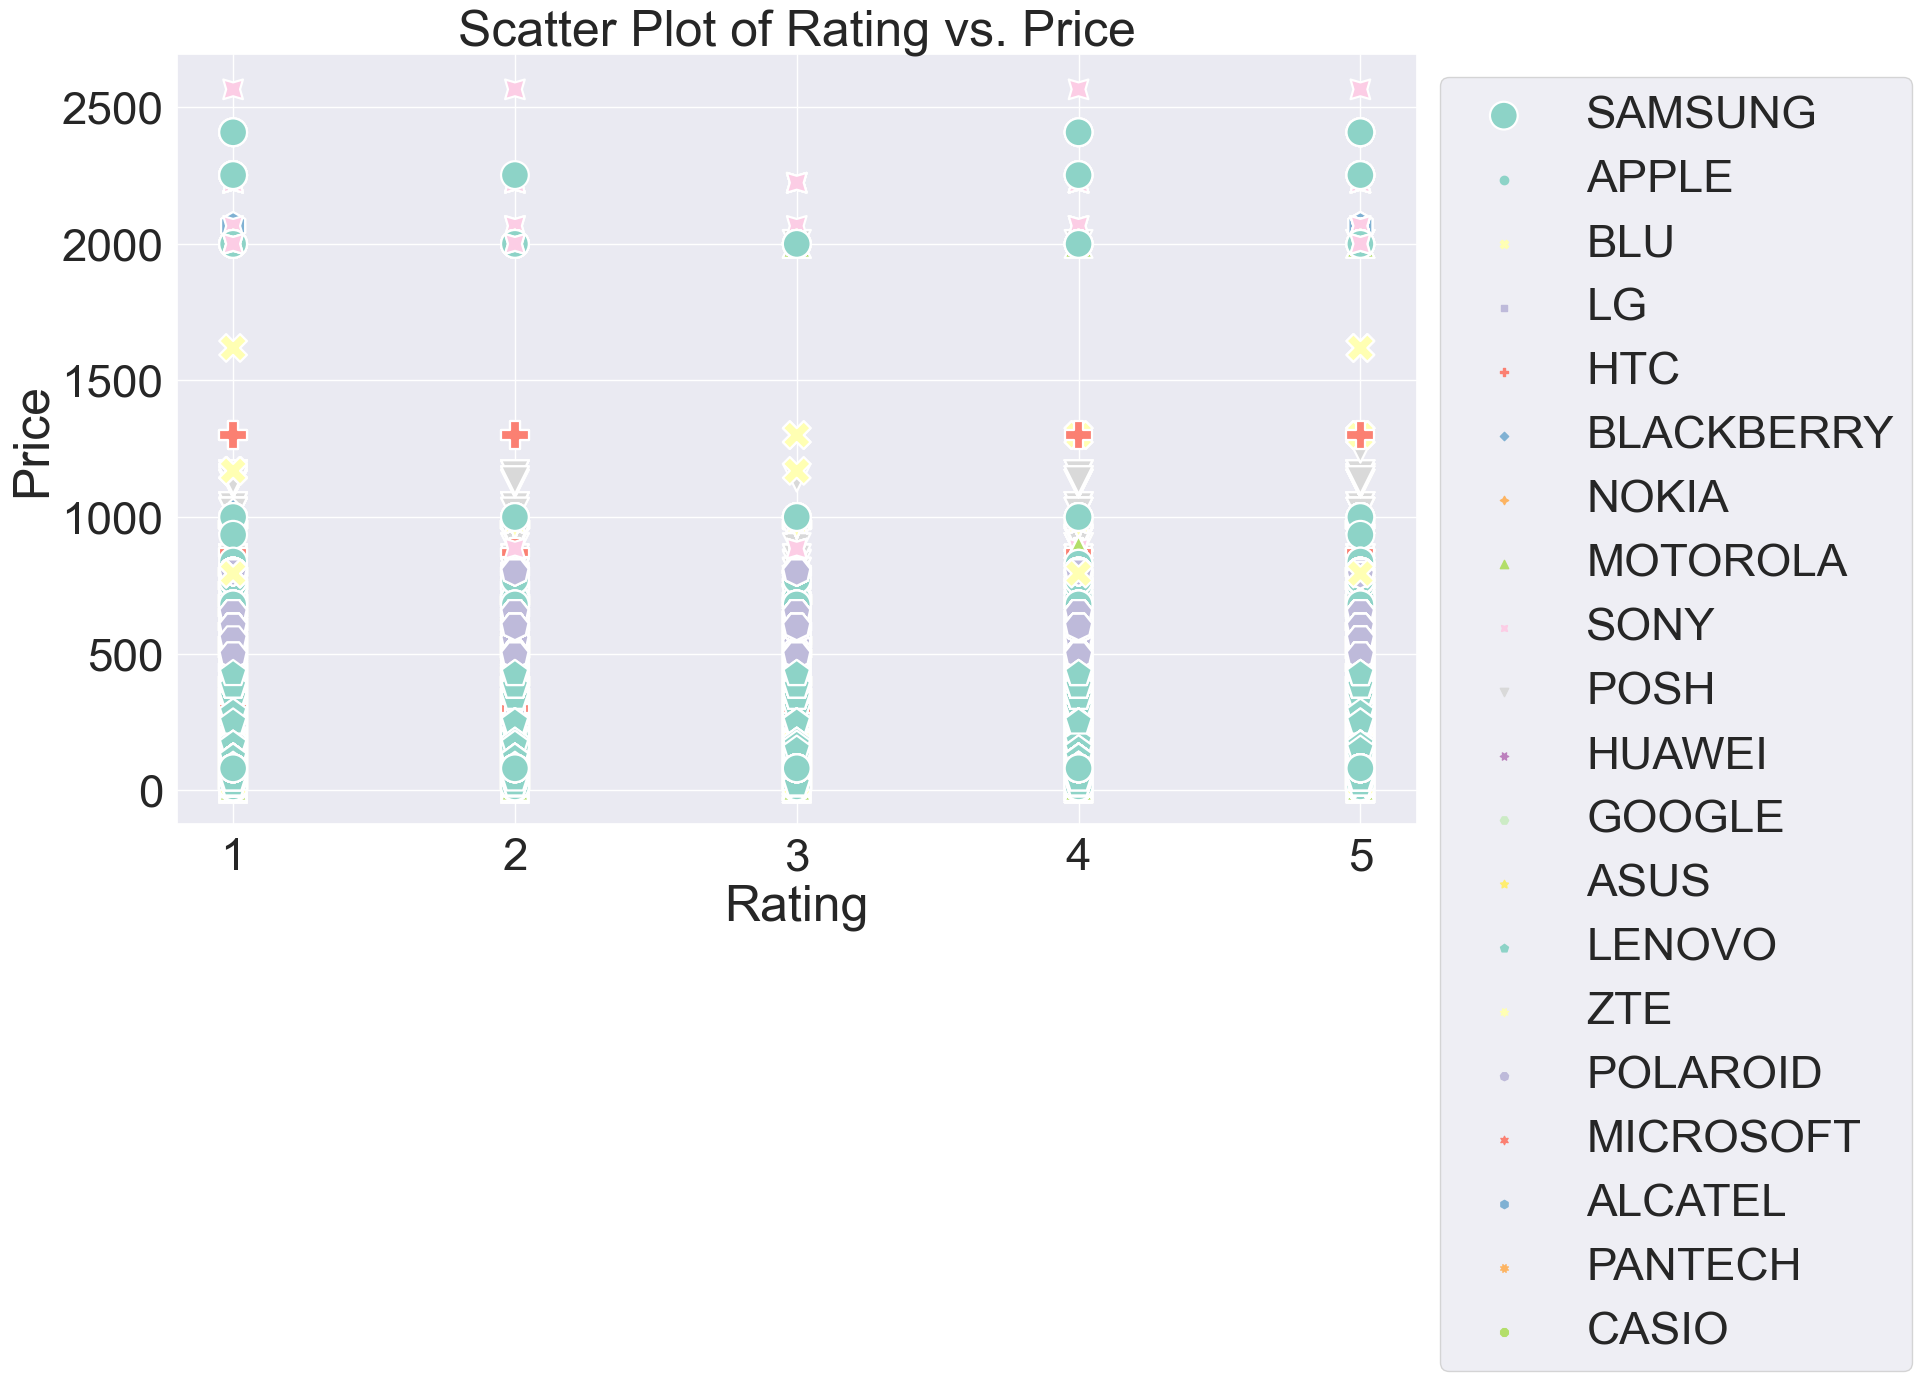

In [35]:
# Specifying top 20 brands 
top20brands = df['Brand Name'].value_counts().head(20).index
sns.set(font_scale=3)

# Scatter plot of Rating vs. Price on the top 20 brands
fig=plt.figure(figsize=(16, 10))
sns.scatterplot(data=df[df['Brand Name'].isin(top20brands)],
                x='Rating', y='Price', hue='Brand Name', palette='Set3', s=400, style='Brand Name')
text=plt.title('Scatter Plot of Rating vs. Price')
axisx=plt.xlabel('Rating')
axisy=plt.ylabel('Price')
plt.xticks(range(1, 6))
lgd=plt.legend(loc='upper left', bbox_to_anchor=(1, 1),labels=top20brands)
plt.show();
fig.savefig('Scatter Plot of rating vs.Price.png', dpi=fig.dpi, bbox_extra_artists=(lgd,text), bbox_inches='tight')


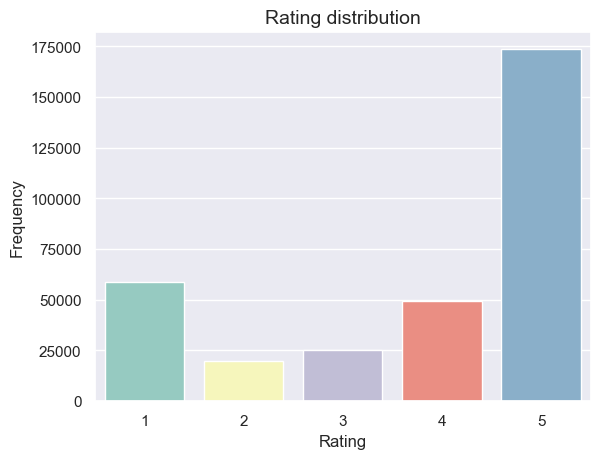

In [36]:
# Equal Distribution of Ratings? 
sns.set(font_scale=1)
sns_plot=sns.countplot(x="Rating", data=df, palette="Set3")
plt.title("Rating distribution", fontsize=14)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()
sns_plot.figure.savefig('Rating Distribution.png')


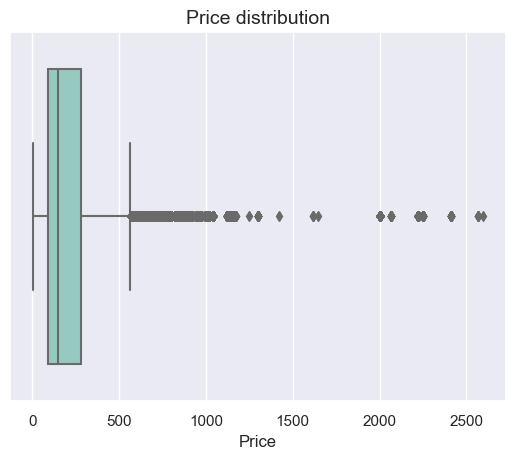

In [37]:
#we check for the price distribution 
sns.set(font_scale=1)
sns_plot=sns.boxplot(x="Price", data=df, palette="Set3")

plt.title("Price distribution", fontsize=14)
plt.show()
sns_plot.figure.savefig('Price distribution.png')


In [38]:
#with a focus on the very expensive cell phones, > 500
expensive=df.loc[df['Price']>500]
expensive.describe()

,Price,Rating,Review Votes
count,34274.000000,34274.000000,34274.000000
mean,832.650184,4.069324,2.347698
std,485.116434,1.485193,16.331882
min,501.000000,1.000000,0.000000
25%,569.980000,4.000000,0.000000
50%,620.000000,5.000000,0.000000
75%,769.990000,5.000000,1.000000
max,2598.000000,5.000000,478.000000


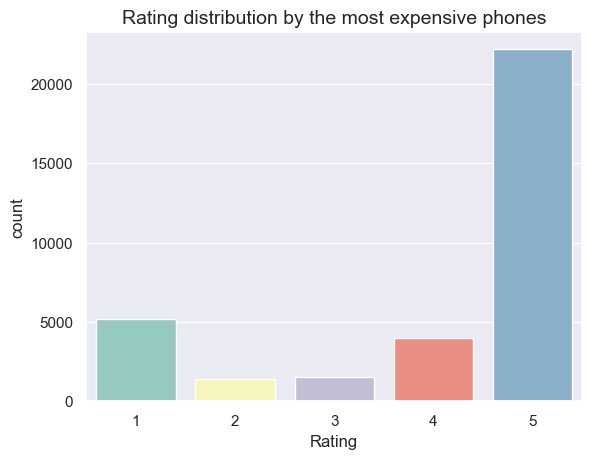

In [39]:
#what is the rating distribution among the most exoensive phones?
sns.set(font_scale=1)
sns_plot=sns.countplot(x="Rating", data=expensive, palette="Set3")
plt.title("Rating distribution by the most expensive phones", fontsize=14)
plt.show()
sns_plot.figure.savefig('Rating of the most expensive.png')


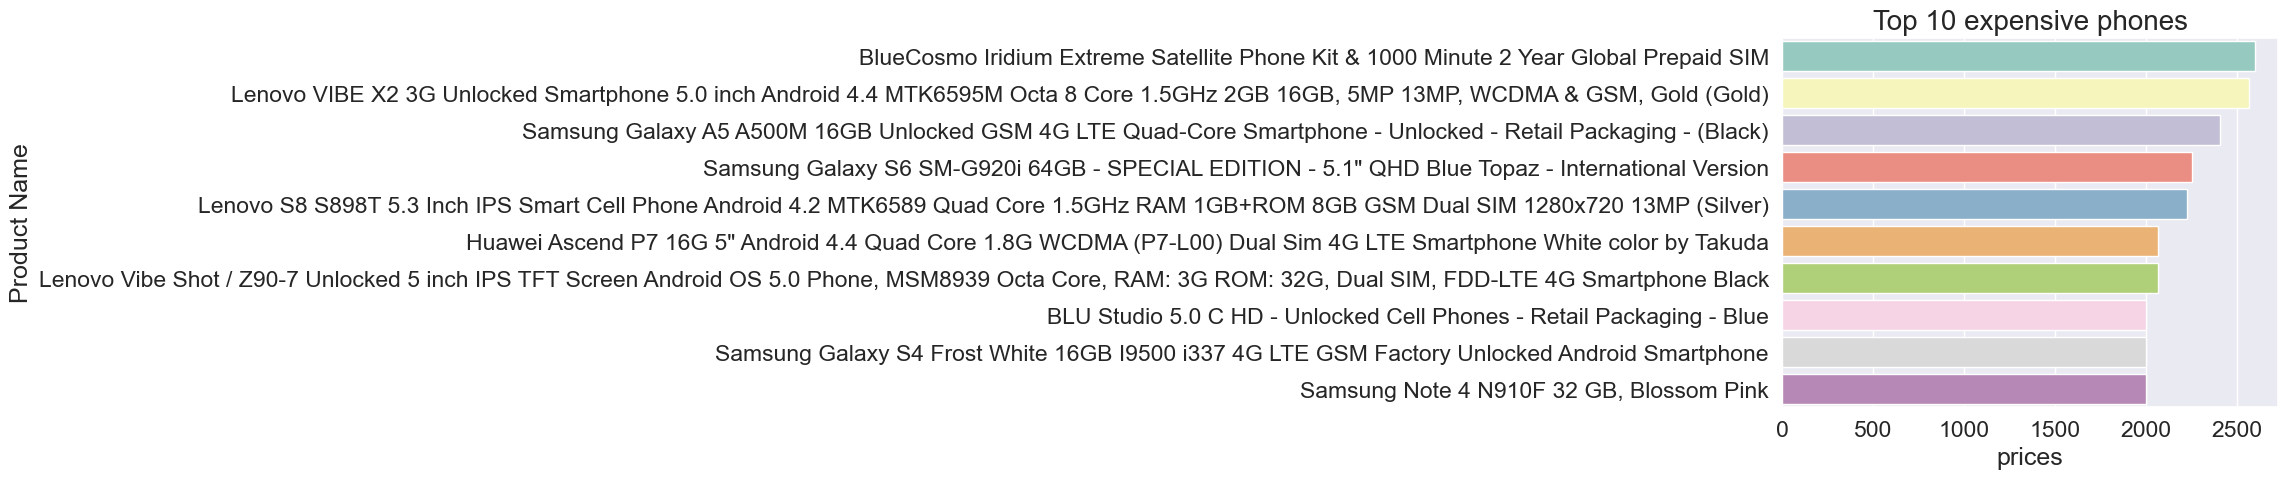

In [40]:
#What are the top 10 best rated, most expensive cell phones?
sns.set(font_scale=1.5)
# Group by Product Name and the Price
aggregated_data = df.groupby('Product Name')['Price'].mean().reset_index()

# Sorting the aggregated DataFrame by rating in descending order
sorted_aggregated_data_price = aggregated_data.sort_values(by='Price', ascending=False)

# Selection of the first 10 best-rated phones
top_expensive_phones = sorted_aggregated_data_price.head(10)
sns.set(font_scale=1.5)
# Graph display
sns.barplot(y='Product Name', x='Price', data=top_expensive_phones, orient = 'h', palette='Set3')
textx=plt.xlabel('prices')
texty=plt.ylabel('Product Name')
plt.title(f'Top 10 expensive phones', fontsize=20);
fig.savefig('Top 10 expensive phones', dpi=fig.dpi, bbox_extra_artists=(texty,textx), bbox_inches='tight')


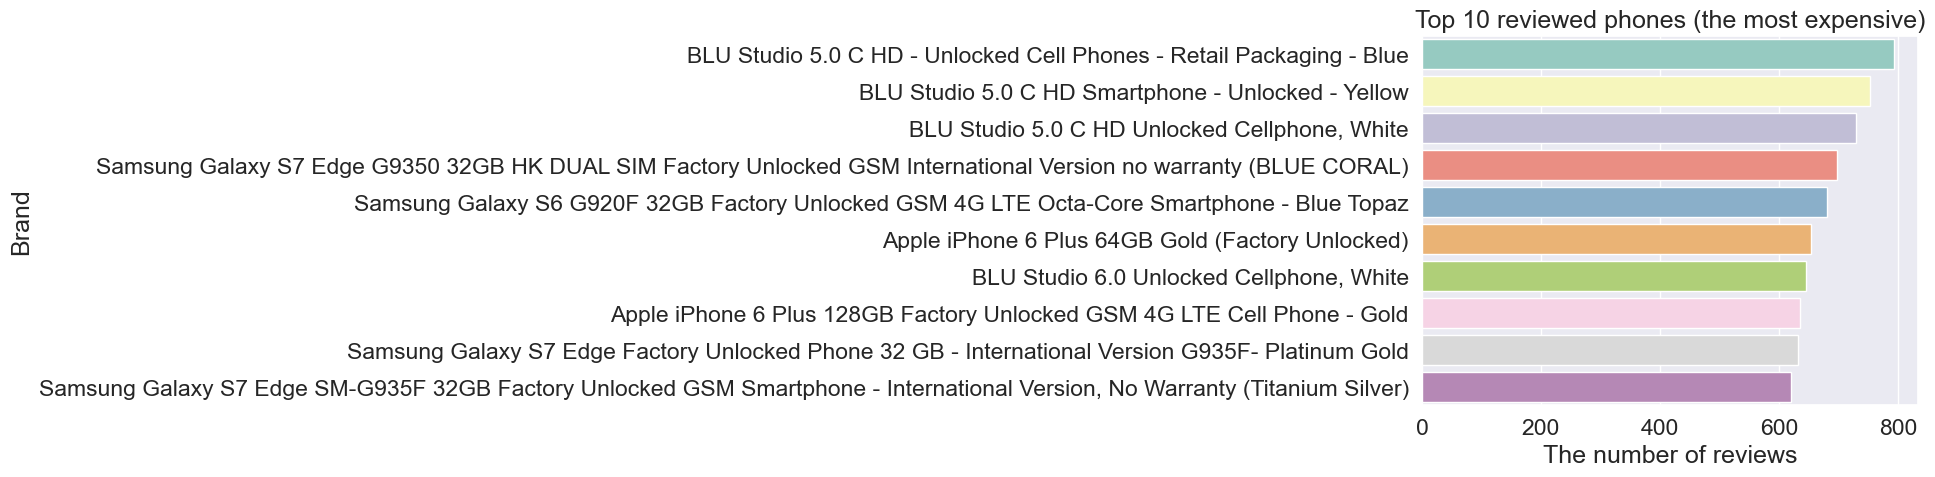

In [41]:
# What are the most expensive, most rated cell phones?
sns.set(font_scale=1.5)
# Group by Product Name and calculate the quantity of ratings
aggregated_data = expensive.groupby('Product Name')['Reviews'].count().reset_index()

# Sorting the aggregated DataFrame by rating in descending order
sorted_aggregated_expensive = aggregated_data.sort_values(by='Reviews', ascending=False)

# Selection of the first 10 best-rated cell phones
top_reviewed_expensive = sorted_aggregated_expensive.head(10)

# Graph display
sns_plot= sns.barplot(y='Product Name', x='Reviews', data=top_reviewed_expensive, orient = 'h', palette='Set3')
plt.xlabel('The number of reviews')
plt.ylabel('Brand')
plt.title(f'Top 10 reviewed phones (the most expensive)');

sns_plot.figure.savefig('Top reviewed from the most expensive.png')

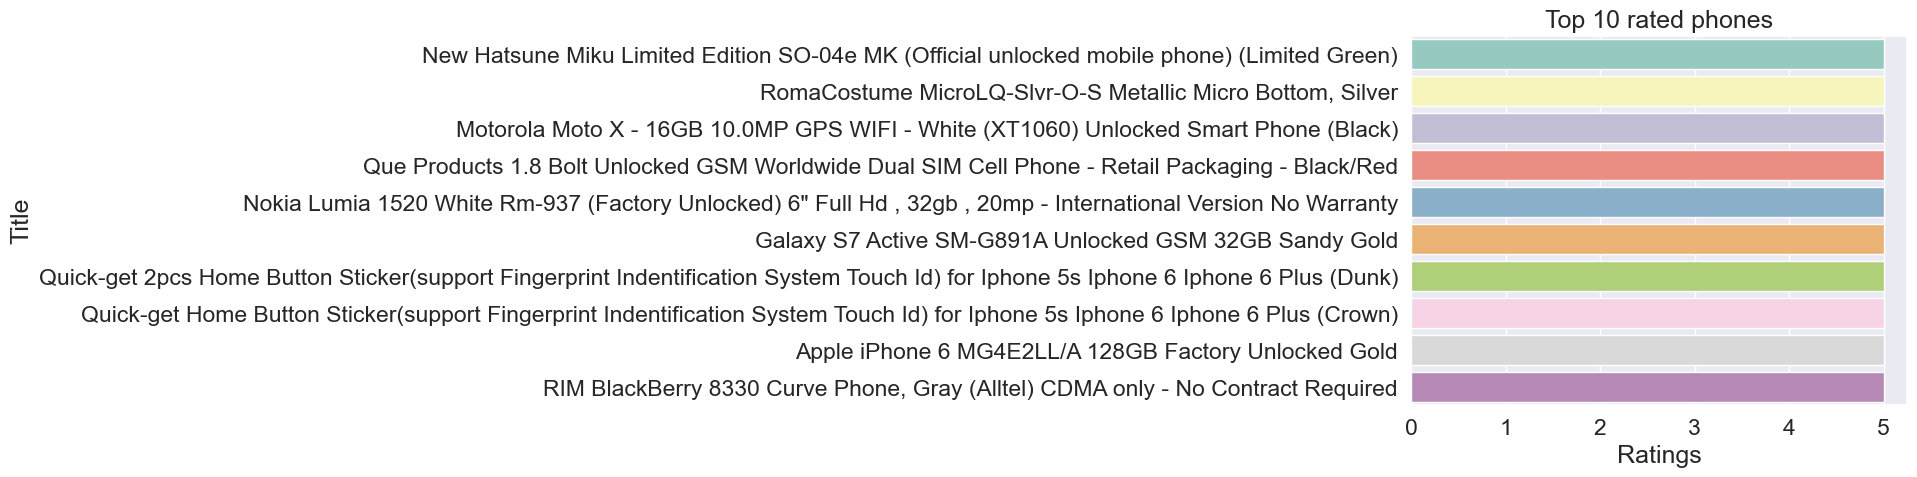

In [42]:
# Group by Product Name and calculate the mean of ratings
aggregated_data = df.groupby('Product Name')['Rating'].mean().reset_index()
sns.set(font_scale=1.5)
# Sorting the aggregated DataFrame by rating in descending order
sorted_aggregated_data_ratings = aggregated_data.sort_values(by='Rating', ascending=False)

# Selection of the first 10 best-rated cell phones
top_rated_phones = sorted_aggregated_data_ratings.head(10)

# Graph display
sns.barplot(y='Product Name', x='Rating', data=top_rated_phones, orient = 'h', palette='Set3')
plt.xlabel('Ratings')
plt.ylabel('Title')
plt.title(f'Top 10 rated phones');
#here it is not taken into account that the reviewed once telephone can have Rating 5



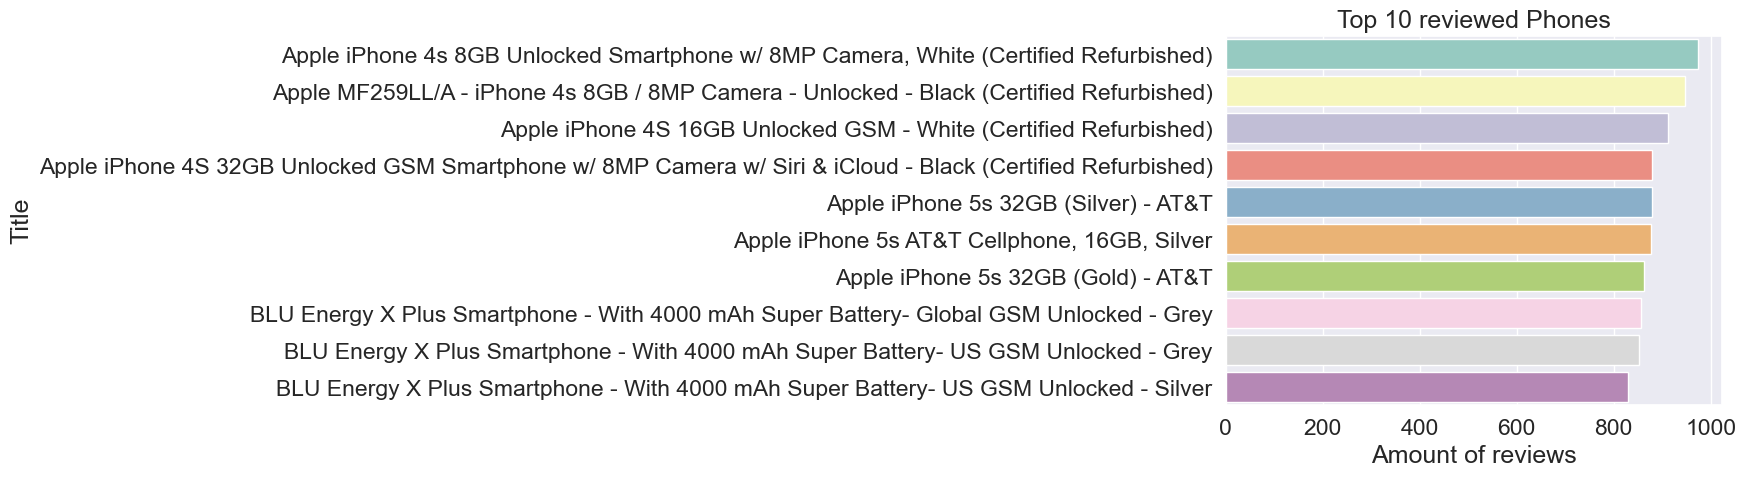

In [43]:
# Group by Product Name and calculate the quantity of ratings
aggregated_data = df.groupby('Product Name')['Reviews'].count().reset_index()
sns.set(font_scale=1.5)
# Sorting the aggregated DataFrame by rating in descending order
sorted_aggregated_data_review = aggregated_data.sort_values(by='Reviews', ascending=False)

# Selection of the first 10 best-rated cell phones
top_reviewed_phones = sorted_aggregated_data_review.head(10)

# Graph display
sns_plot=sns.barplot(y='Product Name', x='Reviews', data=top_reviewed_phones, orient = 'h', palette='Set3')
plt.xlabel('Amount of reviews')
plt.ylabel('Title')
plt.title(f'Top 10 reviewed Phones');

sns_plot.figure.savefig('Top 10 review Phones.png')

In [44]:
sorted_aggregated_data_review.shape

(4277, 2)

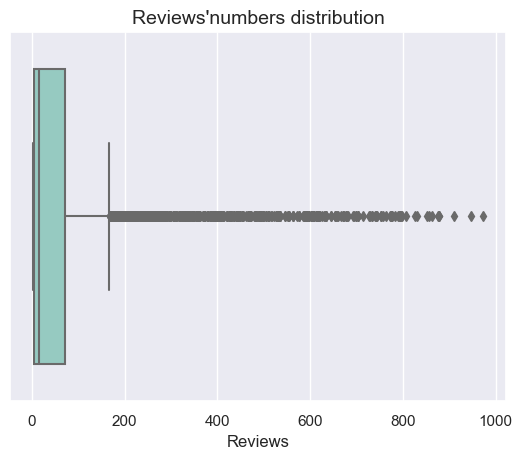

In [45]:
#Distribution of reviews Number for each Product Name



sns.set(font_scale=1)
sns_plot=sns.boxplot(x="Reviews", data=sorted_aggregated_data_review, palette="Set3")

plt.title("Reviews'numbers distribution", fontsize=14)
plt.show()
sns_plot.figure.savefig('Reviews distribution.png')




In [46]:
aggregation = {"Rating": "mean",
               "Reviews": "count"}

phones = df.groupby(["Product Name"]).agg(aggregation).sort_values(by=['Reviews'], ascending=False).reset_index()
phones

,Product Name,Rating,Reviews
0,Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP...,3.323409,974
1,Apple MF259LL/A - iPhone 4s 8GB / 8MP Camera -...,3.314678,947
2,Apple iPhone 4S 16GB Unlocked GSM - White (Cer...,3.327113,911
3,Apple iPhone 4S 32GB Unlocked GSM Smartphone w...,3.331058,879
4,Apple iPhone 5s 32GB (Silver) - AT&T,3.928246,878
...,...,...,...
4272,BlueCosmo Iridium Extreme Satellite Phone Kit ...,5.000000,1
4273,BlueCosmo Iridium Extreme Satellite Phone Kit ...,5.000000,1
4274,Samsung Galaxy S3 I747 16GB Unlocked GSM 4G LT...,1.000000,1
4275,Straight Talk Huawei Glory 868 Pre-Paid Cell P...,5.000000,1


In [47]:
most_reviews=phones.loc[phones['Reviews']>200]
most_reviews.describe()

,Rating,Reviews
count,516.000000,516.000000
mean,3.818946,404.071705
std,0.332627,172.474714
min,2.643077,201.000000
25%,3.617928,264.000000
50%,3.859782,354.000000
75%,4.045141,504.000000
max,4.508306,974.000000


In [48]:
#What are the most reviewed Phones
most_reviews

,Product Name,Rating,Reviews
0,Apple iPhone 4s 8GB Unlocked Smartphone w/ 8MP...,3.323409,974
1,Apple MF259LL/A - iPhone 4s 8GB / 8MP Camera -...,3.314678,947
2,Apple iPhone 4S 16GB Unlocked GSM - White (Cer...,3.327113,911
3,Apple iPhone 4S 32GB Unlocked GSM Smartphone w...,3.331058,879
4,Apple iPhone 5s 32GB (Silver) - AT&T,3.928246,878
...,...,...,...
511,"BLU Studio 5.0 LTE, 8MP, ( 4GB+1GB RAM)- Facto...",3.714286,203
512,HTC Desire 610 8GB Unlocked GSM 4G LTE Quad-Co...,3.584158,202
513,HTC Vivid X710a 16GB Unlocked GSM Android Dual...,3.415842,202
514,Verizon Samsung Alias 2 U750 No Contract Dual-...,4.373134,201


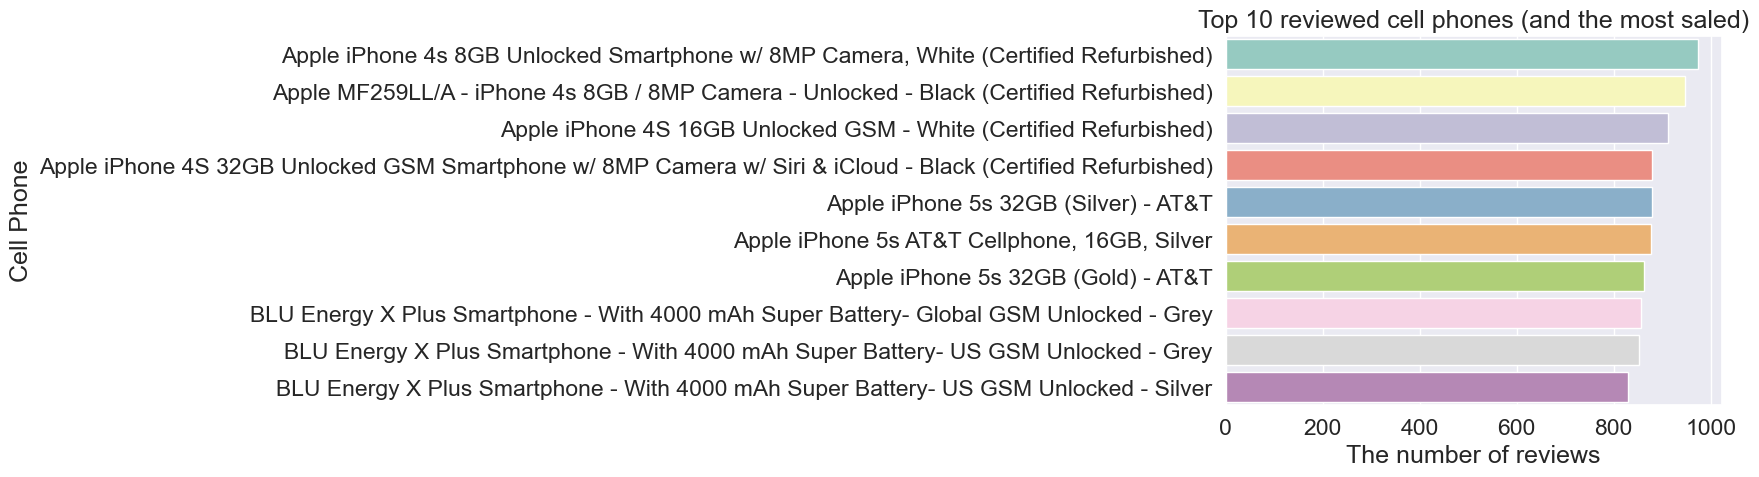

In [49]:

sns.set(font_scale=1.5)
# Graph display
sns.barplot(y='Product Name', x='Reviews', data=most_reviews.head(10), orient = 'h', palette='Set3')
plt.xlabel('The number of reviews')
plt.ylabel('Cell Phone')
plt.title(f'Top 10 reviewed cell phones (and the most saled)');

In [50]:
#What are the least reviewed phones ?

low_review=phones.loc[phones['Reviews']==1]
low_review.describe()

,Rating,Reviews
count,353.000000,353.0
mean,3.320113,1.0
std,1.709621,0.0
min,1.000000,1.0
25%,1.000000,1.0
50%,4.000000,1.0
75%,5.000000,1.0
max,5.000000,1.0


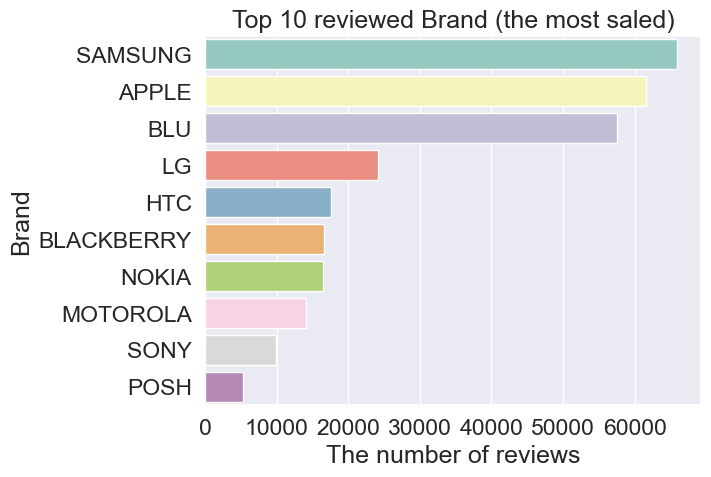

In [51]:
# Group by brand name  and calculate the quantity of reviewss
aggregated_data = df.groupby('Brand Name')['Reviews'].count().reset_index()

# Sorting the aggregated DataFrame by rating in descending order
sorted_aggregated_brand = aggregated_data.sort_values(by='Reviews', ascending=False)

# Selection of the first 10 best-rated cell phones
top_reviewed_brand = sorted_aggregated_brand.head(10)

# Graph display
sns.barplot(y='Brand Name', x='Reviews', data=top_reviewed_brand, orient = 'h', palette='Set3')
plt.xlabel('The number of reviews')
plt.ylabel('Brand')
plt.title(f'Top 10 reviewed Brand (the most saled)');

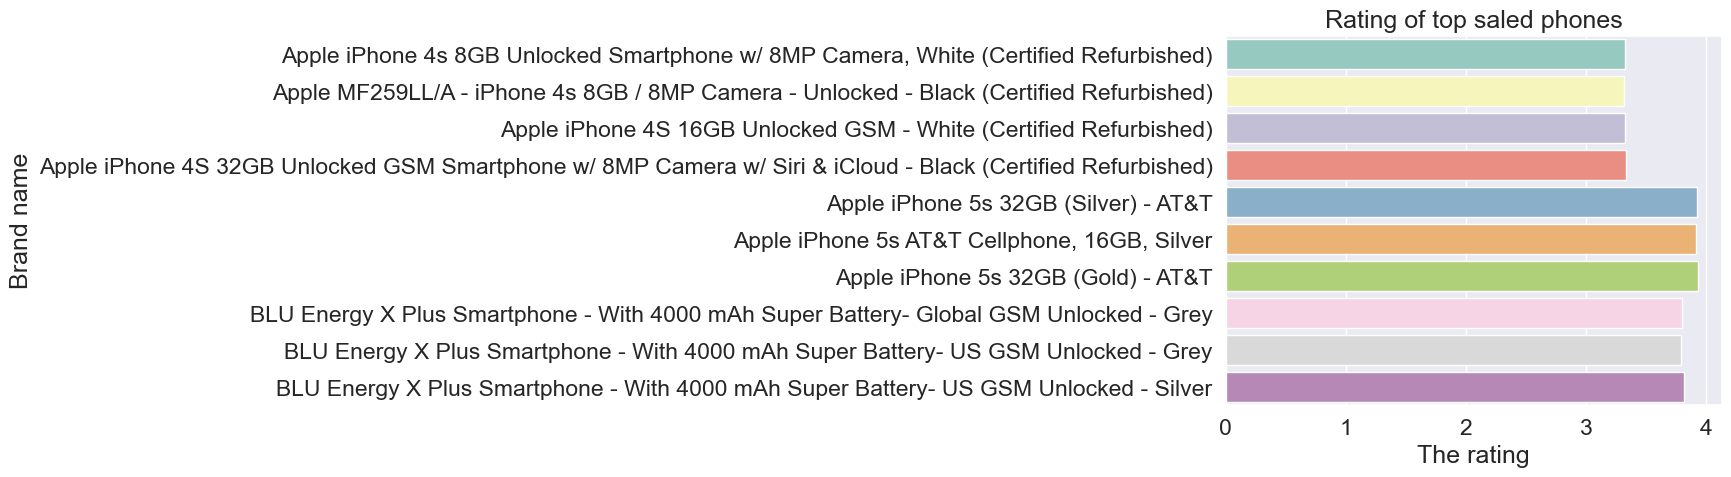

In [52]:

sns.barplot(y='Product Name', x='Rating', data=most_reviews.head(10), orient = 'h', palette='Set3')
plt.xlabel('The rating')
plt.ylabel('Brand name')
plt.title(f'Rating of top saled phones');

In [53]:
C=phones['Reviews'].mean()
M=phones['Rating'].mean()
def bayesian_avg(phones):
    return (C * M + phones.sum()) / (C + phones.count())
# Graph display

bayesian_avg_ratings = phones.groupby('Product Name')['Rating'].agg(bayesian_avg).reset_index().sort_values(by=['Rating'], ascending=False)


bayesian_avg_ratings

,Product Name,Rating
2383,New Hatsune Miku Limited Edition SO-04e MK (Of...,3.635015
2882,RomaCostume MicroLQ-Slvr-O-S Metallic Micro Bo...,3.635015
2257,Motorola Moto X - 16GB 10.0MP GPS WIFI - White...,3.635015
2851,Que Products 1.8 Bolt Unlocked GSM Worldwide D...,3.635015
2534,Nokia Lumia 1520 White Rm-937 (Factory Unlocke...,3.635015
...,...,...
124,Andy A3.5EP Factory Unlocked Phone Yezz Wirele...,3.583341
2335,Motorola i870 for Sprint Nextel or Boost Mobile,3.583341
2301,Motorola RIZR Z3 Unlocked GSM Quadband Cell Ph...,3.583341
2686,Oukitel C3 Unlocked Android 6.0 3G Smartphone ...,3.583341


In [54]:
bayesian_avg_ratings.columns = ['Product Name', 'bayesian_avg']

bayesian_avg_ratings

,Product Name,bayesian_avg
2383,New Hatsune Miku Limited Edition SO-04e MK (Of...,3.635015
2882,RomaCostume MicroLQ-Slvr-O-S Metallic Micro Bo...,3.635015
2257,Motorola Moto X - 16GB 10.0MP GPS WIFI - White...,3.635015
2851,Que Products 1.8 Bolt Unlocked GSM Worldwide D...,3.635015
2534,Nokia Lumia 1520 White Rm-937 (Factory Unlocke...,3.635015
...,...,...
124,Andy A3.5EP Factory Unlocked Phone Yezz Wirele...,3.583341
2335,Motorola i870 for Sprint Nextel or Boost Mobile,3.583341
2301,Motorola RIZR Z3 Unlocked GSM Quadband Cell Ph...,3.583341
2686,Oukitel C3 Unlocked Android 6.0 3G Smartphone ...,3.583341


<Axes: xlabel='bayesian_avg'>

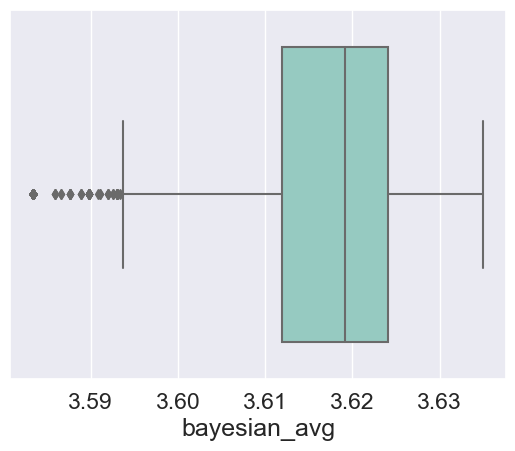

In [55]:
sns.boxplot(x="bayesian_avg", data=bayesian_avg_ratings, palette="Set3")
#The baeyesina average distribution in quite narrow and does not bring some specific information

In [56]:
phones_full = df.merge(phones, on='Product Name')
phones_full.head(2)

,Product Name,Brand Name,Price,Rating_x,Reviews_x,Review Votes,Rating_y,Reviews_y
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",SAMSUNG,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,3.702703,37
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",SAMSUNG,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,3.702703,37


In [57]:
phones_full = phones_full.rename(columns={'Rating_x': 'Stars',
                                          'Reviews_x': 'Text',
                                          'Rating_y': 'AverageRating',
                                          'Reviews_y': 'ReviewsNumber'})

In [58]:
phones_full

,Product Name,Brand Name,Price,Stars,Text,Review Votes,AverageRating,ReviewsNumber
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",SAMSUNG,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,3.702703,37
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",SAMSUNG,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,3.702703,37
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",SAMSUNG,199.99,5,Very pleased,0.0,3.702703,37
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",SAMSUNG,199.99,4,It works good but it goes slow sometimes but i...,0.0,3.702703,37
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",SAMSUNG,199.99,4,Great phone to replace my lost phone. The only...,0.0,3.702703,37
...,...,...,...,...,...,...,...,...
326794,Samsung Convoy U640 Phone for Verizon Wireless...,SAMSUNG,79.95,5,"Great phone. Large keys, best flip phone I hav...",0.0,4.025000,320
326795,Samsung Convoy U640 Phone for Verizon Wireless...,SAMSUNG,79.95,5,"Pros...Works great, very durable, easy to navi...",0.0,4.025000,320
326796,Samsung Convoy U640 Phone for Verizon Wireless...,SAMSUNG,79.95,5,just as described perfect for the price,0.0,4.025000,320
326797,Samsung Convoy U640 Phone for Verizon Wireless...,SAMSUNG,79.95,1,Would not work,0.0,4.025000,320


In [59]:
phones_full['Text'].isnull().sum()

0

In [60]:
bad_rating=phones_full[(phones_full['Stars'] ==1) | (phones_full['Stars'] ==2)]
good_rating=phones_full[(phones_full['Stars'] ==4) | (phones_full['Stars'] ==5)]
middle_rating=phones_full[(phones_full['Stars'] ==3)]

In [61]:
def f(row):
    
    '''This function returns sentiment value based on the overall ratings from the user'''
    
    if row['Stars'] == 3.0:
        val = 'Neutral'
    elif row['Stars'] == 1.0 or row['Stars'] == 2.0:
        val = 'Negative'
    elif row['Stars'] == 4.0 or row['Stars'] == 5.0:
        val = 'Positive'
    else:
        val = -1
    return val

In [62]:
phones_full['Sentiment'] = phones_full.apply(f, axis=1)
phones_full.head()

,Product Name,Brand Name,Price,Stars,Text,Review Votes,AverageRating,ReviewsNumber,Sentiment
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",SAMSUNG,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,3.702703,37,Positive
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",SAMSUNG,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,3.702703,37,Positive
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",SAMSUNG,199.99,5,Very pleased,0.0,3.702703,37,Positive
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",SAMSUNG,199.99,4,It works good but it goes slow sometimes but i...,0.0,3.702703,37,Positive
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",SAMSUNG,199.99,4,Great phone to replace my lost phone. The only...,0.0,3.702703,37,Positive


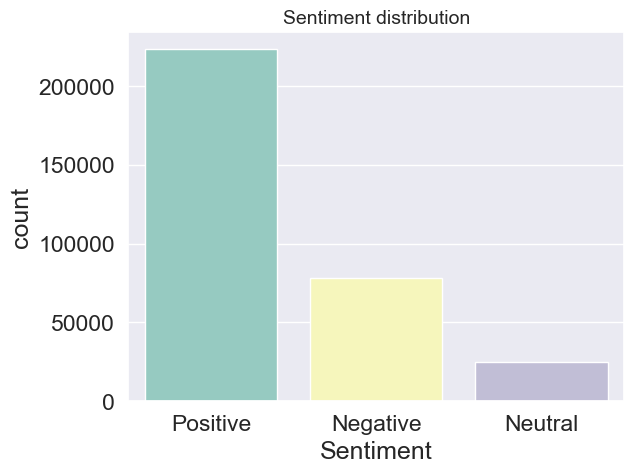

In [63]:
#after dataframe cleaning
sns.countplot(x="Sentiment", data=phones_full, palette="Set3")
plt.title("Sentiment distribution", fontsize=14)
plt.show()

In [64]:
phones_price=phones_full.sort_values(by=['Price'], ascending=False)
phones_price

,Product Name,Brand Name,Price,Stars,Text,Review Votes,AverageRating,ReviewsNumber,Sentiment
136676,BlueCosmo Iridium Extreme Satellite Phone Kit ...,IRIDIUM,2598.0,5,"These folks are good! Knowledgeable, helpful, ...",0.0,5.000000,1,Positive
162533,Lenovo VIBE X2 3G Unlocked Smartphone 5.0 inch...,LENOVO,2566.0,4,"the phone is cover my expectatives, the qualit...",1.0,3.000000,4,Positive
162531,Lenovo VIBE X2 3G Unlocked Smartphone 5.0 inch...,LENOVO,2566.0,1,Bought two of these as Christmas gifts. One of...,0.0,3.000000,4,Negative
162532,Lenovo VIBE X2 3G Unlocked Smartphone 5.0 inch...,LENOVO,2566.0,2,I loved the phone and the style however it wou...,1.0,3.000000,4,Negative
162534,Lenovo VIBE X2 3G Unlocked Smartphone 5.0 inch...,LENOVO,2566.0,5,Thank you!,0.0,3.000000,4,Positive
...,...,...,...,...,...,...,...,...,...
318461,Unlocked LG Optimus G E973 F180 K 3G WCDMA + 4...,LG,NaN,1,"Don't buy it....The phone is damaged, Imei Nul...",0.0,2.333333,6,Negative
318462,Unlocked LG Optimus G E973 F180 K 3G WCDMA + 4...,LG,NaN,1,Korean phone can change to English but still s...,0.0,2.333333,6,Negative
318463,Unlocked LG Optimus G E973 F180 K 3G WCDMA + 4...,LG,NaN,3,it doesn't came unlocked! I had to many proble...,0.0,2.333333,6,Neutral
318464,Unlocked LG Optimus G E973 F180 K 3G WCDMA + 4...,LG,NaN,3,it's not working to Movistar venezuela,1.0,2.333333,6,Neutral


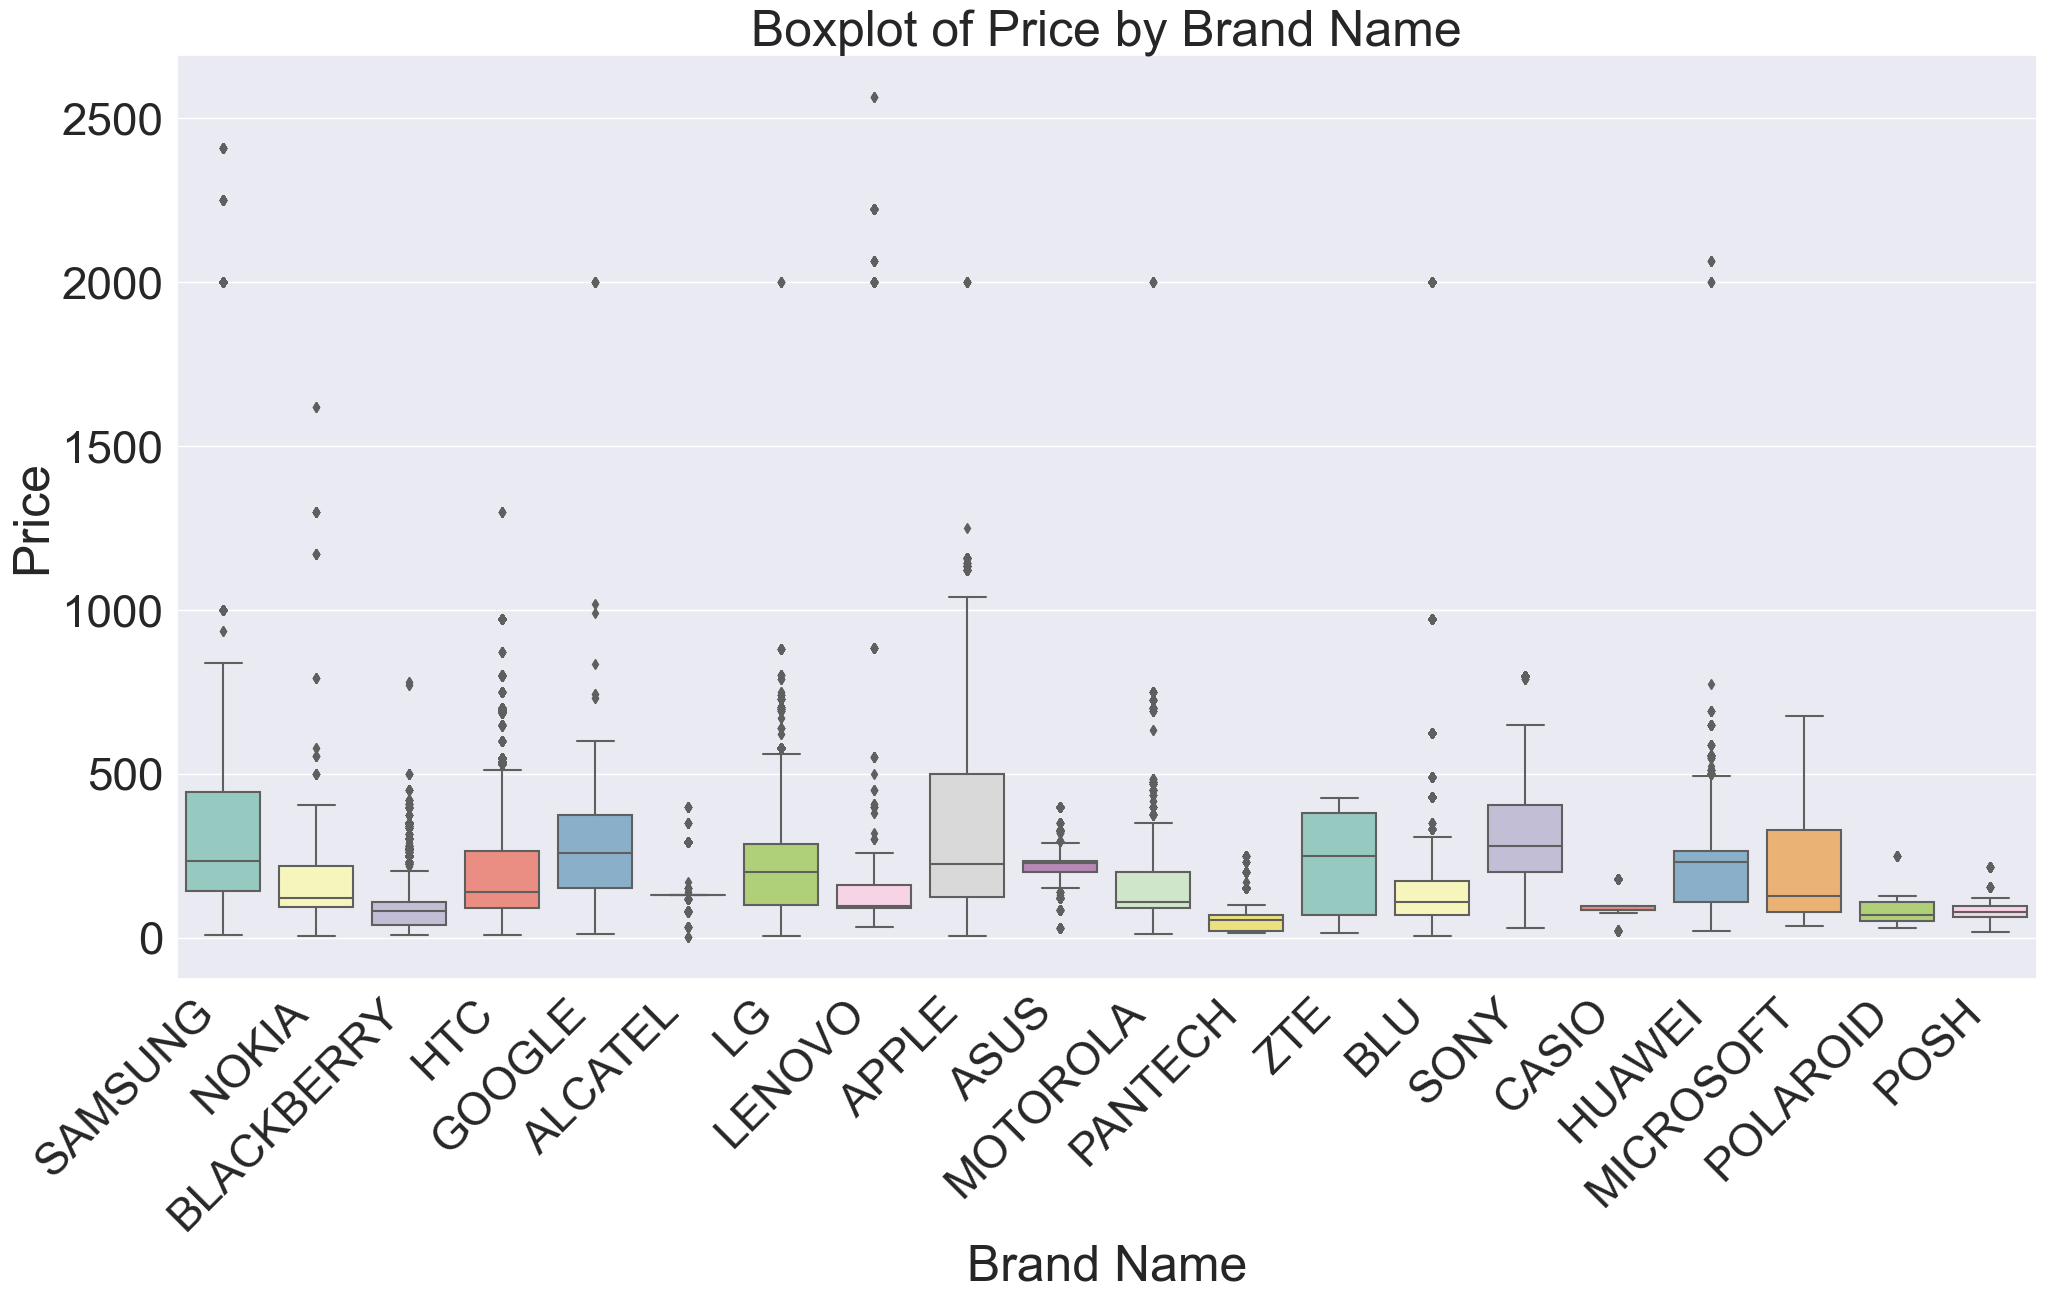

In [65]:
# Boxplot of Price by selected top 20 Brand Names
# Specify brands to display in the boxplot
sns.set(font_scale=3)
plt.figure(figsize=(24, 12))
sns_plot=sns.boxplot(data=df[df['Brand Name'].isin(top20brands)], x='Brand Name', y='Price', palette='Set3')
plt.title('Boxplot of Price by Brand Name')
plt.xlabel('Brand Name')
plt.ylabel('Price')
plt.xticks(rotation=45, ha='right')
plt.show();
sns_plot.figure.savefig('Boxplot of Price by Brand name.png')

/Users/solozobovavaleria/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/solozobovavaleria/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/solozobovavaleria/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/solozobovavaleria/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/Users/solozobovavaleria/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:1609: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/Users/solozobo

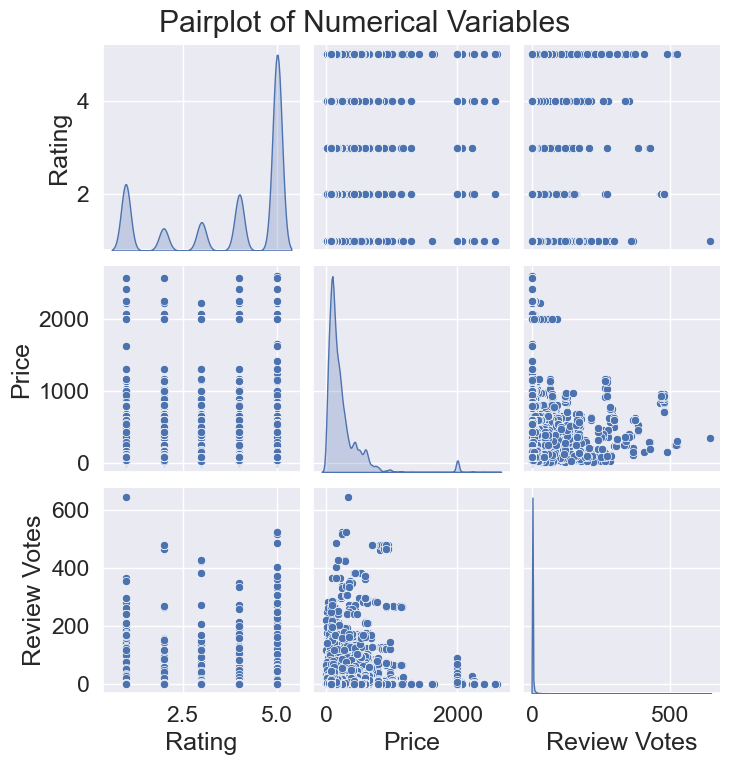

In [66]:
# Pairplot for numerical variables
sns.set(font_scale=1.5)
sns_plot=sns.pairplot(df[['Rating', 'Price', 'Review Votes']],palette='Set3', diag_kind='kde')
textx=plt.suptitle('Pairplot of Numerical Variables', y=1.02)
plt.show();

sns_plot.figure.savefig('Rating-price-review votes.png')

/var/folders/bg/6h6fxpzx7_v6jgvd0c31r_7m0000gn/T/ipykernel_39602/3611433913.py:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns_plot=sns.barplot(data=top20brands_df, x='Brand Name', y='Price', ci=None, palette='Set3')


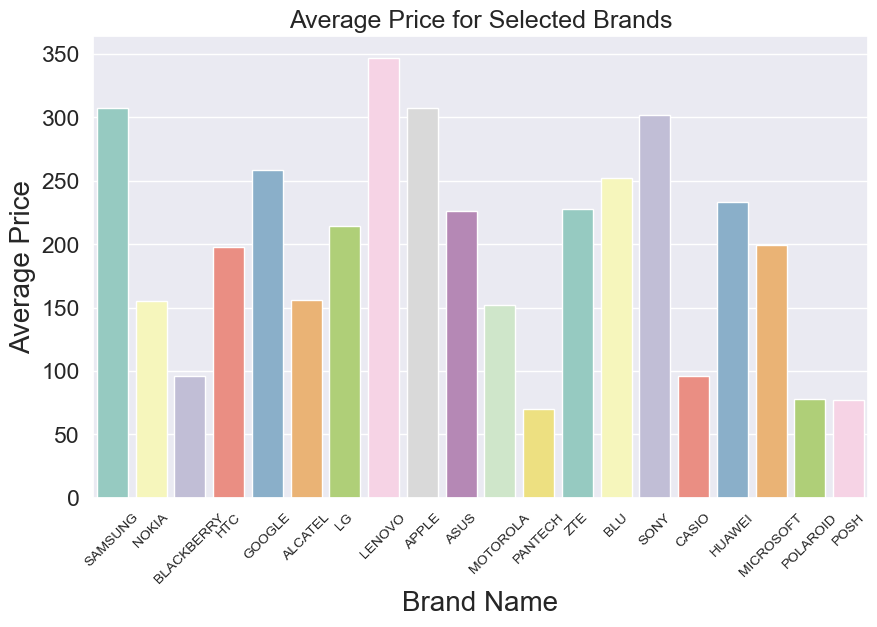

In [67]:
top20brands_df = df[df['Brand Name'].isin(top20brands)]

# Bar plot for average price per brand
plt.figure(figsize=(10, 6))
sns_plot=sns.barplot(data=top20brands_df, x='Brand Name', y='Price', ci=None, palette='Set3')

plt.title('Average Price for Selected Brands')
plt.xlabel('Brand Name', fontsize=20)
plt.ylabel('Average Price', fontsize=20)
plt.xticks(rotation =45, fontsize=10)
plt.show();
sns_plot.figure.savefig('Average Price of Selected brands.png')


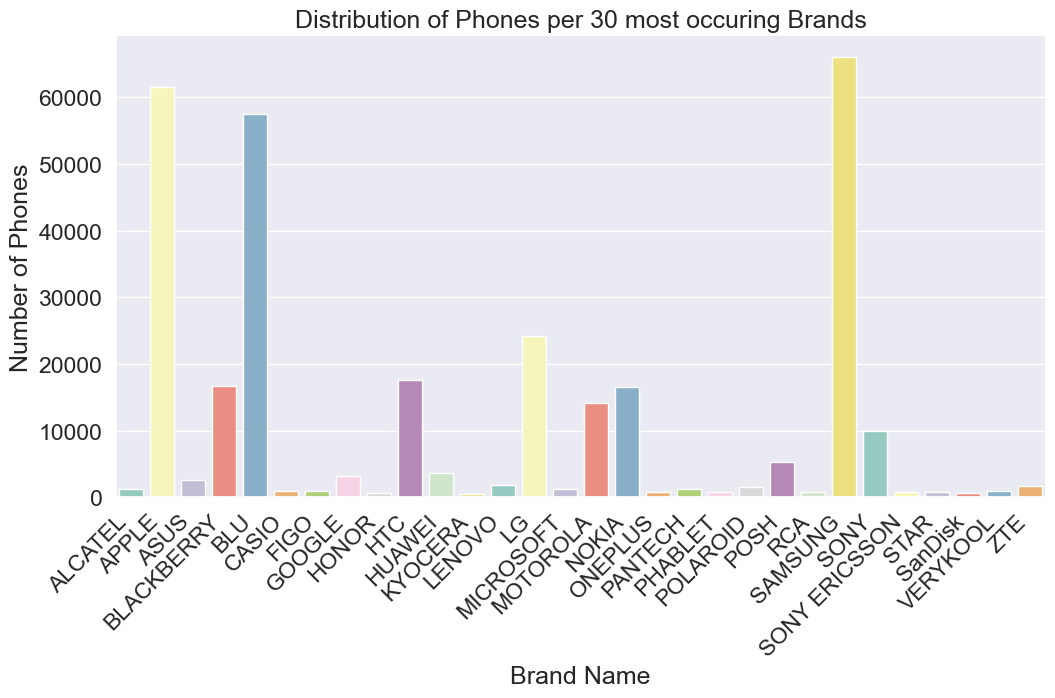

In [68]:
# Count plot for the distribution of phones per brand
plt.figure(figsize=(12, 6))
top30_phones = df['Brand Name'].value_counts().head(30)
sns_plot=sns.countplot(data=df[df['Brand Name'].isin(top30_phones.index)].sort_values('Brand Name', ascending=True), x='Brand Name', palette='Set3')

plt.title('Distribution of Phones per 30 most occuring Brands')
texty=plt.xlabel('Brand Name')
plt.ylabel('Number of Phones')
textx=plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

sns_plot.figure.savefig('Distribution of Phones per 30 most revewed brands.png',dpi=fig.dpi, bbox_extra_artists=(texty,textx))

In [69]:
import csv 

#the save the file in csv
phones_full.to_csv('supply_chain_cleaned_Valeria_05_06.csv', sep=',',index=False,  encoding='UTF8')    
    